# Bangalore House Price Prediction

This notebook only train ML model on different ml algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
"""from google.colab import files
files=files.upload()
df = pd.read_csv('oh_encoded_data.csv')"""

"from google.colab import files\nfiles=files.upload()\ndf = pd.read_csv('oh_encoded_data.csv')"

In [3]:
# Get clean data
#path = r"https://drive.google.com/uc?export=download&id=1P49POlAk27uRzWKXoR2WaEfb1lyyfiRJ" # oh_encoded_data.csv from drive
path= "D:\AI\Github_standard_end_to_end_projects\Bangalore_house_price\Data.csv"
# This file contain [area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft]
# and ['area_type','availability','location'] this are cat var
# We encoded few classes from above car var in OHE 

df = pd.read_csv(path)
df.shape

(7120, 109)

In [4]:
df.shape

(7120, 109)

In [5]:
df.head()

,Unnamed: 0,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Kothanur,location_Banashankari,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_HSR Layout,location_Chandapura,location_Ramamurthy Nagar,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Yeshwanthpur,location_8th Phase JP Nagar,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Brookefield,location_Vijayanagar,location_Old Airport Road,location_Sahakara Nagar,location_Hosa Road,location_Kengeri,location_Bommasandra,location_Green Glen Layout,location_Balagere,location_Old Madras Road,location_Kudlu Gate,location_Panathur,location_Rachenahalli,location_Yelahanka New Town,location_Jigani,location_Kadugodi,location_Talaghattapura,location_Thigalarapalya,location_Mysore Road,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Devanahalli,location_Nagarbhavi,location_TC Palaya,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur,location_Tumkur Road
0,0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Kothanur,location_Banashankari,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_HSR Layout,location_Chandapura,location_Ramamurthy Nagar,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Yeshwanthpur,location_8th Phase JP Nagar,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Brookefield,location_Vijayanagar,location_Old Airport Road,location_Sahakara Nagar,location_Hosa Road,location_Kengeri,location_Bommasandra,location_Green Glen Layout,location_Balagere,location_Old Madras Road,location_Kudlu Gate,location_Panathur,location_Rachenahalli,location_Yelahanka New Town,location_Jigani,location_Kadugodi,location_Talaghattapura,location_Thigalarapalya,location_Mysore Road,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Devanahalli,location_Nagarbhavi,location_TC Palaya,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(7120, 108)

## Exploratory Data Analysis (EDA)

In [8]:
ltn= df.iloc[:,11:]

In [9]:
len(ltn.columns)

97

In [10]:
# Top locations that has maximum flats available
ltn.sum()[:5]

location_Sarjapur  Road           183
location_Electronic City          158
location_Raja Rajeshwari Nagar    116
location_Marathahalli             116
location_Haralur Road             116
dtype: int64

In [14]:
#Types of flat available (BHK)
df['bhk'].value_counts()

2    3710
3    2420
1     441
4     420
5      69
6      33
7      12
8      11
9       4
Name: bhk, dtype: int64

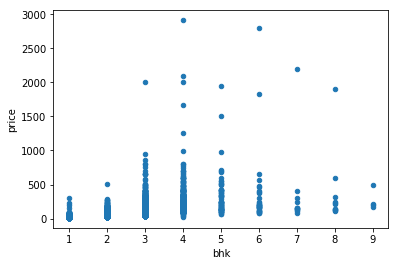

In [21]:
#scatter plot to find the corelation of the size of the flat and the price
df.plot.scatter('bhk', 'price')

In [22]:
# check the price of the 9bhk flat to find if there in any outliers
df['price'][df['bhk']==9]

87      500.0
3530    200.0
4736    210.0
5169    165.0
Name: price, dtype: float64

In [34]:
# Avarage price of the flat
df['price'].mean()

96.45499087078649

In [35]:
# Details of the flat at the lowest price
df[df['price']==df['price'].min()]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Kothanur,location_Banashankari,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_HSR Layout,location_Chandapura,location_Ramamurthy Nagar,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Yeshwanthpur,location_8th Phase JP Nagar,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Brookefield,location_Vijayanagar,location_Old Airport Road,location_Sahakara Nagar,location_Hosa Road,location_Kengeri,location_Bommasandra,location_Green Glen Layout,location_Balagere,location_Old Madras Road,location_Kudlu Gate,location_Panathur,location_Rachenahalli,location_Yelahanka New Town,location_Jigani,location_Kadugodi,location_Talaghattapura,location_Thigalarapalya,location_Mysore Road,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Devanahalli,location_Nagarbhavi,location_TC Palaya,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur,location_Tumkur Road
603,1.0,1.0,10.0,400.0,1,2500.00000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
613,1.0,1.0,10.0,410.0,1,2439.02439,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1508,1.0,1.0,10.0,410.0,1,2439.02439,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Details of the flat at the higest price
df[df['price']==df['price'].max()]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Kothanur,location_Banashankari,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_HSR Layout,location_Chandapura,location_Ramamurthy Nagar,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Yeshwanthpur,location_8th Phase JP Nagar,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Brookefield,location_Vijayanagar,location_Old Airport Road,location_Sahakara Nagar,location_Hosa Road,location_Kengeri,location_Bommasandra,location_Green Glen Layout,location_Balagere,location_Old Madras Road,location_Kudlu Gate,location_Panathur,location_Rachenahalli,location_Yelahanka New Town,location_Jigani,location_Kadugodi,location_Talaghattapura,location_Thigalarapalya,location_Mysore Road,location_Ambedkar Nagar,location_Frazer Town,location_Dodda Nekkundi,location_Attibele,location_Kanakapura,location_Devanahalli,location_Nagarbhavi,location_TC Palaya,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur,location_Tumkur Road
581,5.0,2.0,2912.0,8321.0,4,34995.793775,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# daviation in the price from mean
df['price'].std()

116.18503373021684

In [42]:
#median abs deviation
from statsmodels import robust
robust.mad(df['price'])

35.58245324413445

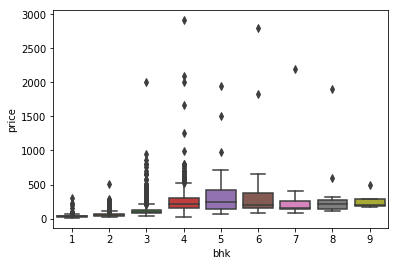

In [46]:
#Box plot
import seaborn as sns
sns.boxplot(y=df['price'],x=df['bhk'])

## Split Dataset in train and test

In [11]:
X= df.drop(['price','price_per_sqft'], 1)
y= df['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 106)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 106)
Shape of y_test =  (1424,)


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Model Training

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [16]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7903837092681368, 64.89843531106975)

In [18]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.7944621580348217, 64.2639781841201)

## Support Vector Machine

In [19]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.3266145828444983, 116.31977779261364)

## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8899592543745244, 47.02171583240904)

## XGBoost

In [18]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

[09:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8759391907485039, 49.92740744112327)

In [19]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score        RMSE
0       Linear Regression  0.790384   64.898435
1                   Lasso  0.803637   62.813243
2  Support Vector Machine  0.206380  126.278064
3           Random Forest  0.889623   47.093442
4                 XGBoost  0.875939   49.927407


## Cross Validation

In [20]:
'''from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs, cvs.mean() # 0.9845963377450353)'''

'from sklearn.model_selection import KFold,cross_val_score\ncvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)\ncvs, cvs.mean() # 0.9845963377450353)'

In [21]:
'''cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)
cvs_rfr, cvs_rfr.mean() # 0.9652425691235843)'''

'cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)\ncvs_rfr, cvs_rfr.mean() # 0.9652425691235843)'

In [22]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)'''

(array([0.99494408, 0.96682912, 0.99720454, 0.96433211, 0.96151867,
        0.94774651, 0.94212832, 0.91069009, 0.99610078, 0.98860838]),
 0.9670102612461828)

# Hyper Parmeter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
'''
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.

              'n_estimators': [100,300,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_) # 0.9397345161940295
print(xgb_grid.best_params_)'''

"\n# Various hyper-parameters to tune\nxgb1 = XGBRegressor()\nparameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM\n              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.\n              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,\n              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.\n              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.\n              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.\n              'objective':['reg:linear'], #This defines the loss function to be minimized.\n\n              'n_estimators': [100,300,500]}\n\nxgb_grid = GridSearchCV(xgb1,\n                        parameters,\n                        cv = 2,\n   

In [24]:
'''xgb_tune = xgb_grid.estimator

xgb_tune.fit(X_train,y_train) # 0.9117591385438816
xgb_tune.score(X_test,y_test)'''

'xgb_tune = xgb_grid.estimator\n\nxgb_tune.fit(X_train,y_train) # 0.9117591385438816\nxgb_tune.score(X_test,y_test)'

In [25]:
'''cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)
cvs, cvs.mean() #  0.9645582338461773)'''

'cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)\ncvs, cvs.mean() #  0.9645582338461773)'

In [26]:
#[i/10.0 for i in range(1,6)]

In [27]:
#xgb_grid.estimator


In [28]:
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8945812461922704

In [29]:
'''parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
              'n_estimators': [100,300,500]}'''

xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[09:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8840983866988691

In [30]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean() #  0.9706000326331659'''

[09:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(array([0.97924577, 0.98376376, 0.97530216, 0.90127522, 0.96273069]),
 0.9604635172361338)

In [31]:
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))

48.25768129834004

## Test Model

In [32]:
list(X.columns)

['bath',
 'balcony',
 'total_sqft_int',
 'bhk',
 'price_per_sqft',
 'area_typeSuper built-up  Area',
 'area_typeBuilt-up  Area',
 'area_typePlot  Area',
 'availability_Ready To Move',
 'location_Whitefield',
 'location_Sarjapur  Road',
 'location_Electronic City',
 'location_Raja Rajeshwari Nagar',
 'location_Marathahalli',
 'location_Haralur Road',
 'location_Hennur Road',
 'location_Bannerghatta Road',
 'location_Uttarahalli',
 'location_Thanisandra',
 'location_Electronic City Phase II',
 'location_Hebbal',
 'location_Yelahanka',
 'location_7th Phase JP Nagar',
 'location_Kanakpura Road',
 'location_KR Puram',
 'location_Sarjapur',
 'location_Rajaji Nagar',
 'location_Bellandur',
 'location_Kasavanhalli',
 'location_Begur Road',
 'location_Kothanur',
 'location_Banashankari',
 'location_Hormavu',
 'location_Harlur',
 'location_Akshaya Nagar',
 'location_Jakkur',
 'location_Electronics City Phase 1',
 'location_Varthur',
 'location_HSR Layout',
 'location_Chandapura',
 'location_Rama

In [33]:
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):

  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model

  # adding feature's value accorind to their column index
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft

  if "availability"=="Ready To Move":
    x[8]=1

  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1

    #print(area_type_index)

  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1

    #print(loc_index)

  #print(x)

  # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  #print(x)

  return model.predict([x])[0] # return the predicted value by train XGBoost model

In [34]:
predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

145.91656

In [35]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#2	Super built-up Area	Ready To Move	Devarabeesana Halli	3.0	2.0	150.0	1750.0	3	8571.428571

predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")

143.71669

In [36]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#1	Built-up Area	Ready To Move	Devarabeesana Halli	3.0	3.0	149.0	1750.0	3	8514.285714
predict_house_price(model=xgb_tune2,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

143.71669

# Save model & load model

In [44]:
import joblib
# save model
joblib.dump(xgb_tune2, 'bangalore_house_price_prediction_model.pkl')
joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')

['bangalore_house_price_prediction_rfr_model.pkl']

In [38]:
# load model
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_model.pkl")

[09:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
# predict house price
predict_house_price(bangalore_house_price_prediction_model,bath=3,balcony=3,total_sqft_int=150,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

65.78738